In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset  (1).csv to Dataset  (1).csv


LEVEL 3 – TASK 1 Predictive Modeling: Restaurant Rating Prediction

In [29]:
features = [
    'Price range',
    'Votes',
    'Table_Booking',
    'Online_Delivery',
    'Restaurant_Name_Length'
]

df_model = df[features + ['Aggregate rating']]
df_model.head()


,Price range,Votes,Table_Booking,Online_Delivery,Restaurant_Name_Length,Aggregate rating
0,3,314,1,0,16,4.8
1,3,591,1,0,16,4.5
2,4,270,1,0,22,4.4
3,4,365,0,0,4,4.9
4,4,229,1,0,11,4.8


In [31]:
df_model.isnull().sum()



,0
Price range,0
Votes,0
Table_Booking,0
Online_Delivery,0
Restaurant_Name_Length,0
Aggregate rating,0


In [33]:
df_model.fillna(0, inplace=True)


/tmp/ipython-input-3445439971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.fillna(0, inplace=True)


In [34]:
X = df_model.drop('Aggregate rating', axis=1)
y = df_model['Aggregate rating']


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 1.6739343644806781
R2 Score: 0.2645631770677763


In [38]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, dt_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree MSE: 0.2405138514404347
Decision Tree R2: 0.894331135958594


In [39]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, dt_pred)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred),
        r2_score(y_test, dt_pred)
    ]
})

comparison


,Model,MSE,R2 Score
0,Linear Regression,1.673934,0.264563
1,Decision Tree,0.240514,0.894331


LEVEL 3 – TASK 2 --Customer Preference Analysis

In [40]:
df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)


,Aggregate rating
Cuisines,
"Burger, Bar Food, Steak",4.9
"American, Burger, Grill",4.9
"American, Caribbean, Seafood",4.9
"American, Coffee and Tea",4.9
"Mexican, American, Healthy Food",4.9
"Italian, Bakery, Continental",4.9
"European, Contemporary",4.9
"European, German",4.9
"Continental, Indian",4.9


In [41]:
df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)


,Votes
Cuisines,
"North Indian, Mughlai",53747
North Indian,46241
"North Indian, Chinese",42012
Cafe,30657
Chinese,22085
"North Indian, Mughlai, Chinese",20115
Fast Food,17852
South Indian,16433
"Mughlai, North Indian",15275


LEVEL 3 – TASK 3 --  Data Visualization

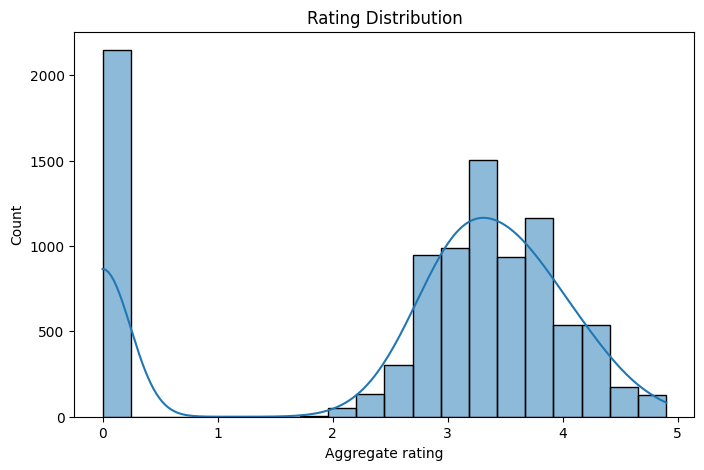

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()


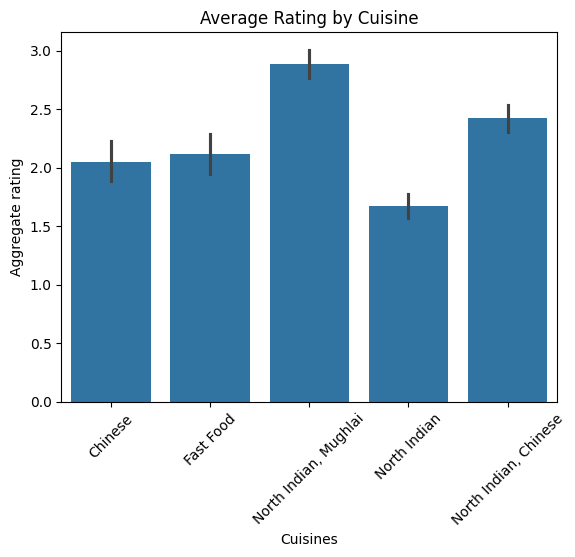

In [43]:
top_cuisines = df['Cuisines'].value_counts().head(5).index
sns.barplot(
    x=df[df['Cuisines'].isin(top_cuisines)]['Cuisines'],
    y=df[df['Cuisines'].isin(top_cuisines)]['Aggregate rating']
)
plt.xticks(rotation=45)
plt.title("Average Rating by Cuisine")
plt.show()
